In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
from matplotlib.pyplot import imshow
from time import time

In [ ]:
MNIST_treino = datasets.MNIST('./', train = True, transform = transforms.ToTensor(), download=True)
MNIST_teste =  datasets.MNIST('./', train = False, transform = transforms.ToTensor(), download=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 109824498.42it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 16454182.81it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 22707514.34it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13463271.21it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



# Nova secção

In [ ]:
loader = DataLoader()

In [ ]:
print(len(MNIST_treino), len(MNIST_teste))

In [ ]:
type(MNIST_teste)

torchvision.datasets.mnist.MNIST

In [ ]:
MNIST_teste[0]

In [ ]:
type(MNIST_teste[0])

tuple

In [ ]:
type(MNIST_teste[0][0])

torch.Tensor

In [ ]:
len(MNIST_teste[0][0])

1

In [ ]:
MNIST_teste[0][0]

In [ ]:
MNIST_teste[0][0][0].shape

torch.Size([28, 28])

In [ ]:
MNIST_teste[0][0][0].shape[0]

28

In [ ]:
MNIST_teste[0][0][0].shape[0] * MNIST_teste[0][0][0].shape[1]

784

3


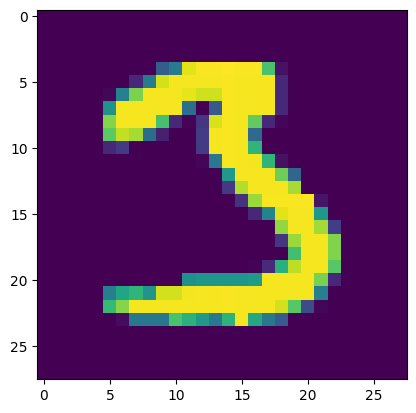

In [ ]:
imagem, rotulo = MNIST_treino[11111]

imshow(imagem[0])
print(rotulo)

In [ ]:
args = {
    'batch_size':       5,    #quantidade de amostras por iteração
    'num_threads':      4,    #número de threads do DataLoader
    #número real de batches = 20 (tamanho de cada batch * quantidade de threads)
    'num_classes':      len(MNIST_teste.classes),
    'taxa_aprendizado': 1e-4, #
    'weight_decay':     5e-4, #
    'num_epochs':       30    #
}
neurons = {
    'input_size':   1 * 28 * 28, #dimensão de entrada (imagens de 28x28 bits com 1 canal de cor. precisa ser achatado para uma única dimensão)
    'hidden_size':  128, # dimensão escondida, hiperparâmetro
    'out_size':     args['num_classes']
}

In [ ]:
treino_loader = DataLoader(MNIST_treino,
                          batch_size = args['batch_size'],
                          shuffle = True,
                          num_workers = args['num_threads'])

teste_loader = DataLoader(MNIST_teste,
                          batch_size = args['batch_size'],
                          shuffle = True,
                          num_workers = args['num_threads'])


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class MNIST_MLP(nn.Module):
  #Definição da nossa própria multi-layered perceptron
  def __init__(self, input_size, hidden_size, out_size):
    super(MNIST_MLP, self).__init__()

    #Definição das camadas e das funções de ativação intermediárias
    # aqui escolhemos duas redes lineares e como funções de ativação, ReLU duas vezes
    self.features  = nn.Sequential(
                        nn.Linear(input_size, hidden_size),
                        nn.ReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.ReLU())
    #A de saída também será linear
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()
    #Como estamos lidando com um processo de classificação, passaremos por um softmax

  def forward(self, input):
    #Define a computação de cada chamada
    input = input.view(input.size(0), -1) #Linearizando a entrada

    feature = self.features(input)
    output  = self.softmax(self.out(feature))

    return output


In [ ]:
rede = MNIST_MLP(neurons['input_size'], neurons['hidden_size'], neurons['out_size'])

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
optimizer = optim.Adam(rede.parameters(), lr=args['taxa_aprendizado'], weight_decay=args['weight_decay'])
#Pesquisar sobre pq Adam (sei leigamente que é mt bom)

In [ ]:
for epoch in range(args['num_epochs']):
  start = time()

  epoch_loss = []
  for batch in treino_loader:

    dado, rotulo = batch

    # Forward
    pred = rede(dado)
    loss = criterion(pred, rotulo) #CrossEntropy indicado para classificação multiclasses
    epoch_loss.append(loss.item())

    # Backward
    loss.backward()
    optimizer.step()

  epoch_loss = np.asarray(epoch_loss)
  end = time()

  print("Epoca %d, Loss: %.4f +\- %.4f, Tempo: %.2f" % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start) )


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoca 0, Loss: 1.9854 +\- 0.2230, Tempo: 95.34
Epoca 1, Loss: 2.0603 +\- 0.2187, Tempo: 98.01
Epoca 2, Loss: 2.1950 +\- 0.1984, Tempo: 106.76
Epoca 3, Loss: 2.2567 +\- 0.1799, Tempo: 118.48
Epoca 4, Loss: 2.2907 +\- 0.1683, Tempo: 118.00
Epoca 5, Loss: 2.3126 +\- 0.1586, Tempo: 117.34
Epoca 6, Loss: 2.3271 +\- 0.1532, Tempo: 117.39
Epoca 7, Loss: 2.3371 +\- 0.1472, Tempo: 118.31
Epoca 8, Loss: 2.3434 +\- 0.1442, Tempo: 116.90


KeyboardInterrupt: ignored